In [8]:
import json

from regulus import Circuit
from regulus.models import HamiltonianModel
from regulus.utils.display import print_circ_info
from regulus.transforms import hierarchy, rebase, mirror
from regulus.utils import arch

In [9]:
json_fname = './hamlib_json/binaryoptimization/graph-gnp_k-4-gnp-k_4_n-6_rinst-15.json'
# json_fname = './hamlib_json/chemistry/all-vib-f2-enc_gray_dvalues_d-level-16.json'

In [10]:
with open(json_fname, 'r') as f:
    data = json.load(f)

In [11]:
ham = HamiltonianModel(data['paulis'], data['coeffs'])

In [12]:
circ = ham.generate_circuit()
print_circ_info(circ)

┏━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┓
┃ num_qubits ┃ num_gates ┃ num_2q_gates ┃ depth ┃ depth_2q ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━┩
│ 6          │ 315       │ 90           │ 207   │ 78       │
└────────────┴───────────┴──────────────┴───────┴──────────┘

In [13]:
circ_opt = ham.reconfigure_and_generate_circuit('su4')
print_circ_info(circ_opt)
circ_opt.gate_stats()

┏━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┓
┃ num_qubits ┃ num_gates ┃ num_2q_gates ┃ depth ┃ depth_2q ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━┩
│ 6          │ 75        │ 15           │ 21    │ 7        │
└────────────┴───────────┴──────────────┴───────┴──────────┘

{'Can': 15, 'U3': 60}

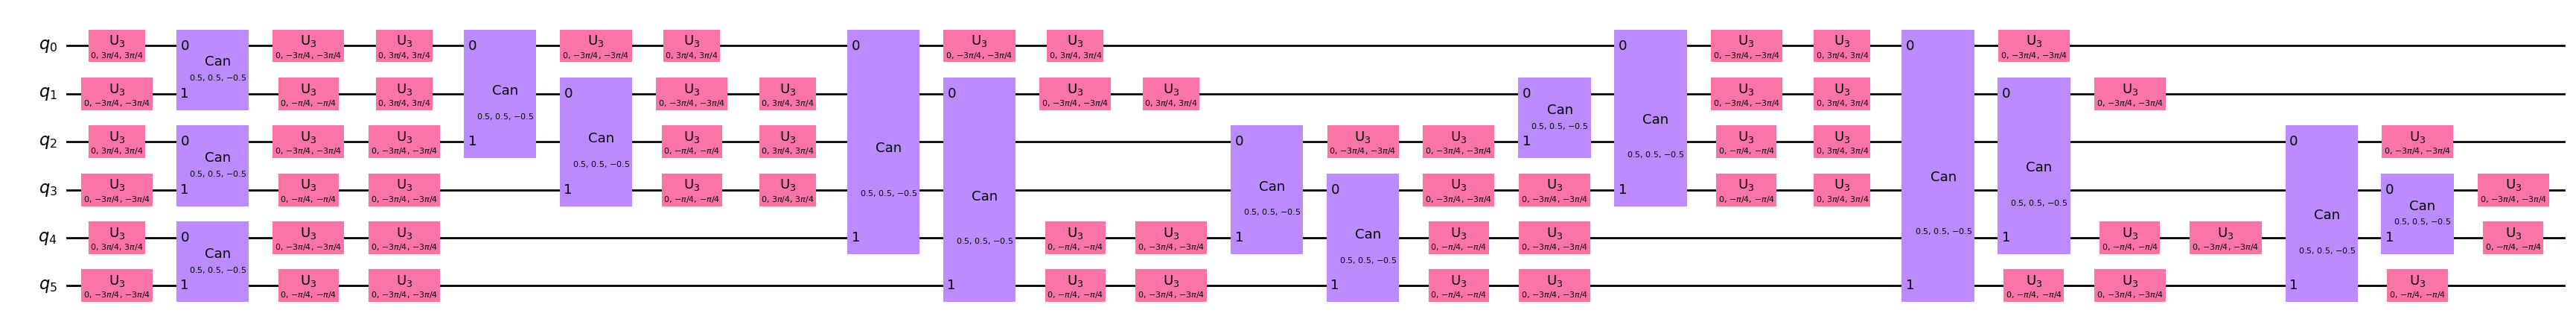

In [14]:
circ_opt.to_qiskit().draw('mpl', fold=200, style='clifford')


In [75]:
device = arch.gene_grid_2d_graph(circ_opt.num_qubits)
circ_mapped, _, _ = mirror.mirror_with_sabre(circ_opt, device)

──────────────────────────────────────── SABRE bidirectional pass period 1 ────────────────────────────────────────

reversed pass

forward pass

──────────────────────────────────────── SABRE bidirectional pass period 2 ────────────────────────────────────────

reversed pass

forward pass

──────────────────────────────────────── SABRE bidirectional pass period 3 ────────────────────────────────────────

reversed pass

forward pass

──────────────────────────────────────── SABRE bidirectional pass period 4 ────────────────────────────────────────

reversed pass

forward pass

──────────────────────────────────────── SABRE bidirectional pass period 5 ────────────────────────────────────────

reversed pass

forward pass

──────────────────────────────────────── SABRE bidirectional pass period 6 ────────────────────────────────────────

reversed pass

forward pass

──────────────────────────────────────── SABRE bidirectional pass period 7 ────────────────────────────────────────

reversed pass

forward pass

──────────────────────────────────────── SABRE bidirectional pass period 8 ────────────────────────────────────────

reversed pass

forward pass

──────────────────────────────────────── SABRE bidirectional pass period 9 ────────────────────────────────────────

reversed pass

forward pass

─────────────────────────────────────── SABRE bidirectional pass period 10 ────────────────────────────────────────

reversed pass

forward pass

In [29]:
print_circ_info(circ_mapped)


┏━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┓
┃ num_qubits ┃ num_gates ┃ num_2q_gates ┃ depth ┃ depth_2q ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━┩
│ 6          │ 84        │ 24           │ 30    │ 14       │
└────────────┴───────────┴──────────────┴───────┴──────────┘

In [14]:
circ_opt = hierarchy.hierarchical_synthesize(circ_opt)
print_circ_info(circ_opt)

/Users/anan/miniconda3/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/anan/miniconda3/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/anan/miniconda3/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/anan/miniconda3/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/anan/miniconda3/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/anan/miniconda3/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid va

┏━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┓
┃ num_qubits ┃ num_gates ┃ num_2q_gates ┃ depth ┃ depth_2q ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━┩
│ 4          │ 163       │ 53           │ 93    │ 46       │
└────────────┴───────────┴──────────────┴───────┴──────────┘


In [1]:
circ_opt.to_qiskit().draw()

NameError: name 'circ_opt' is not defined